In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [5]:
class ANN(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(4,5),
            nn.Sigmoid(),
            nn.Linear(5, 10),
            nn.Sigmoid(),
            nn.Linear(10, 3),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        return self.model(x)

In [6]:
torch.manual_seed(1)

x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

y_one_hot = torch.zeros(8, 3)
y_one_hot.scatter_(1, y_train.unsqueeze(1), 1)

In [8]:
model = ANN()

optimizer = optim.SGD(model.parameters(), lr=1e-2)
nb_epochs = 2000

for epoch in range(nb_epochs + 1):
    h = F.softmax(model.forward(x_train))
    cost = F.cross_entropy(h, y_train)
    
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epoch, cost.item()
        ))

RuntimeError: size mismatch, m1: [8 x 4], m2: [3 x 5] at C:\w\1\s\tmp_conda_3.7_112106\conda\conda-bld\pytorch_1572952932150\work\aten\src\TH/generic/THTensorMath.cpp:197

In [17]:
import torch
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import random

In [18]:
use_CUDA = torch.cuda.is_available()
device = torch.device("cuda" if use_CUDA else "cpu")

In [24]:
random.seed(777)
torch.manual_seed(777)
if device == "cuda":
    torch.cuda.manual_seed_all(777) 

In [42]:
training_epochs = 15
batch_size = 100

In [29]:
mnist_train = dset.MNIST(root = 'MNIST_data/',
                         train = True,
                         transform=transforms.ToTensor(),
                         download = True)
mnist_test = dset.MNIST(root = 'MNIST_data/',
                       train = False,
                       transform = transforms.ToTensor(),
                       download = True)

mnsit 구현

In [33]:
# dataset loader
data_loader = DataLoader(dataset=mnist_train,
                                          batch_size=batch_size, # 배치 크기는 100
                                          shuffle=True,
                                          drop_last=True)

In [34]:
linear = nn.Linear(28*28, 10, bias = True).to(device)
## .to('cuda') 쿠다 사용하려면

In [43]:
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(linear.parameters(), lr = 0.1)

for epoch in range(training_epochs):
    avg_cost = 0
    batch_len = len(data_loader)
    
    
    for X, Y in data_loader:
        
        X = X.view(-1, 28 * 28).to(device)
        Y.to(device)
        
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        avg_cost += cost
    avg_cost /= batch_len
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.284367919
Epoch: 0002 cost = 0.281780511
Epoch: 0003 cost = 0.279685616
Epoch: 0004 cost = 0.277619869
Epoch: 0005 cost = 0.275881410
Epoch: 0006 cost = 0.274397135
Epoch: 0007 cost = 0.272857159
Epoch: 0008 cost = 0.271618158
Epoch: 0009 cost = 0.270429254
Epoch: 0010 cost = 0.269206345
Epoch: 0011 cost = 0.268258631
Epoch: 0012 cost = 0.267351002
Epoch: 0013 cost = 0.266312867
Epoch: 0014 cost = 0.265639305
Epoch: 0015 cost = 0.264674157
Learning finished


tensor([ True,  True,  True,  ...,  True, False,  True])
tensor(8749) tensor([10000.])
acc: 0.8748999834060669


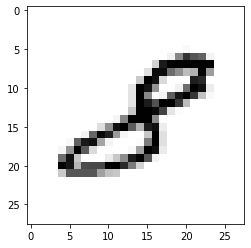

In [63]:
with torch.no_grad(): # torch.no_grad()를 하면 gradient 계산을 수행하지 않는다.
    x_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    y_test = mnist_test.test_labels.to(device)
    
    prediction = linear(x_test)
    correct = torch.argmax(prediction, 1) == y_test
    print(correct)
    print(torch.sum(correct), torch.FloatTensor([len(prediction)]))
    acc = torch.sum(correct) / torch.FloatTensor([len(prediction)])
    print("acc: {}".format(acc.item()))
    
    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28).float(), cmap='Greys', interpolation='nearest')
    plt.show()

Accuracy: 0.8748999834060669
Label:  8
Prediction:  3


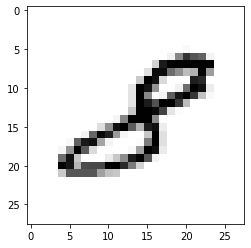

In [59]:
with torch.no_grad(): # torch.no_grad()를 하면 gradient 계산을 수행하지 않는다.
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측을 해본다
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()